# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import math 

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error,confusion_matrix

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Check for the null values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


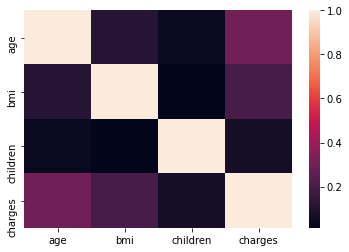

In [6]:
sns.heatmap(df.corr())

In [7]:
sum(df.duplicated(df.columns))
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
df['charges'] = np.log(df['charges'])

In [8]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

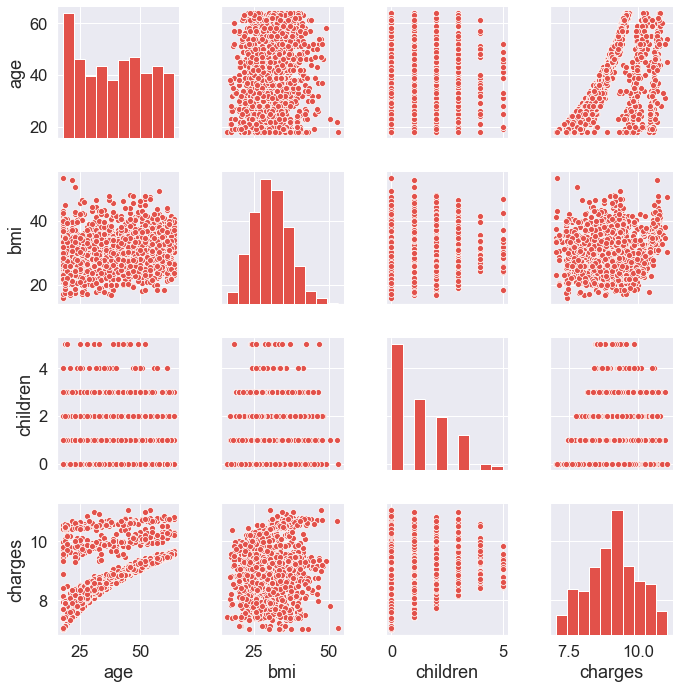

In [9]:
sns.pairplot(df)


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228082F8FC8>,
      dtype=object)

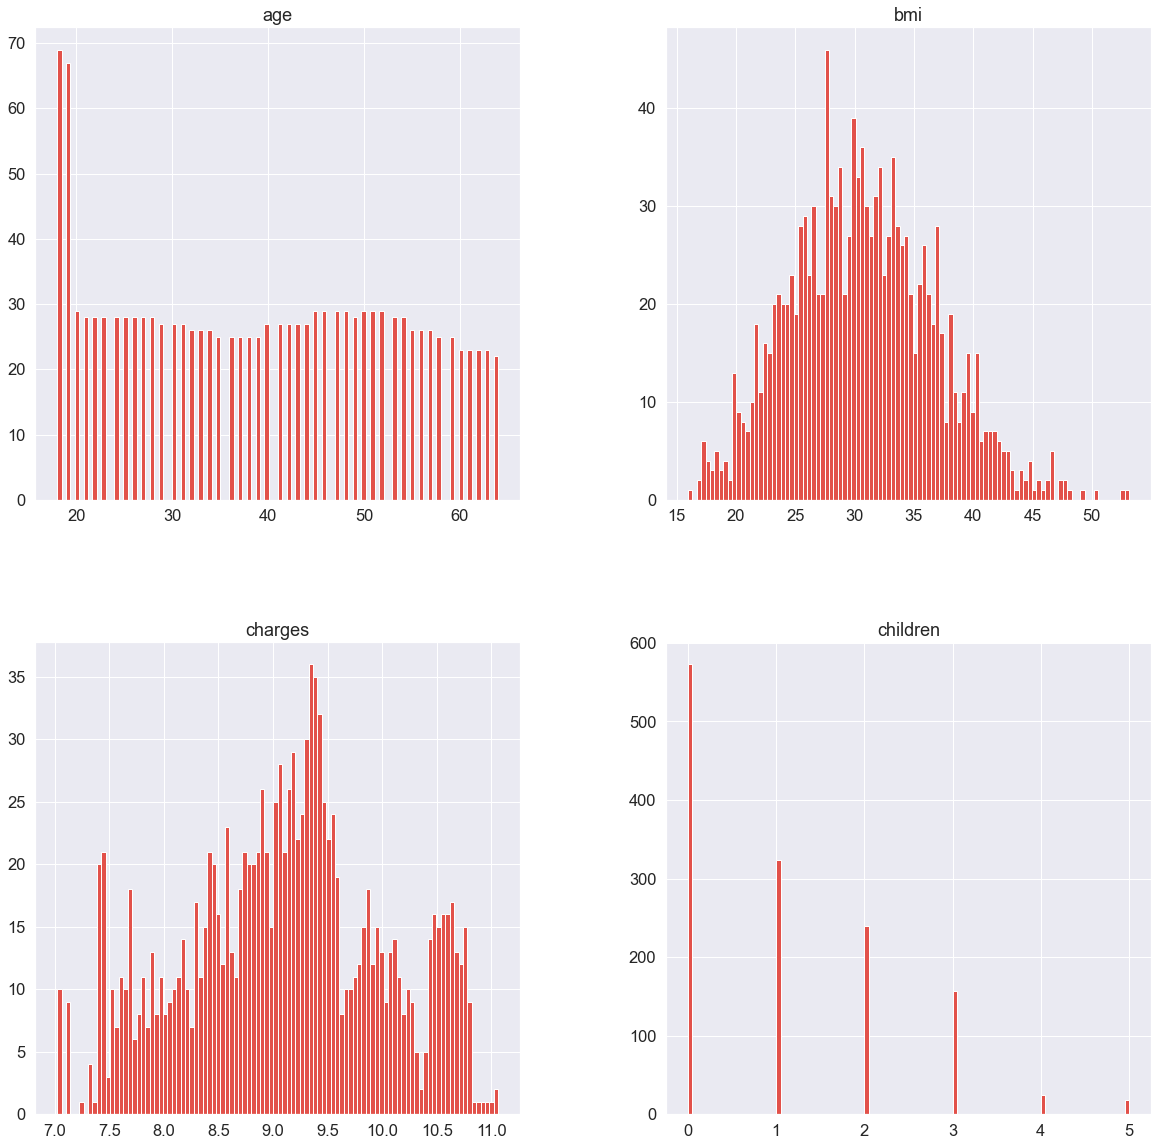

In [10]:
df.hist(figsize = (20,20),bins=100)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
age         1337 non-null int64
sex         1337 non-null object
bmi         1337 non-null float64
children    1337 non-null int64
smoker      1337 non-null object
region      1337 non-null object
charges     1337 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 123.6+ KB


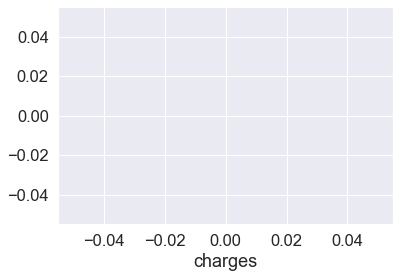

In [12]:

sns.distplot(df[(df.smoker == 1)]["charges"],color='c')

sns.distplot(df[(df.smoker == 0)]['charges'],color='b')


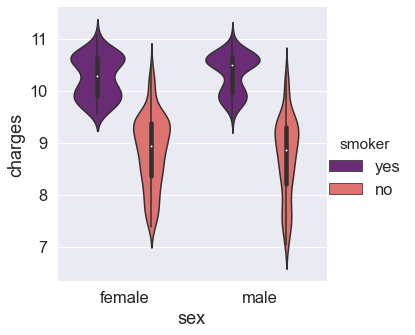

In [13]:
sns.catplot(x="sex", y="charges", hue="smoker",kind="violin", data=df, palette = 'magma')

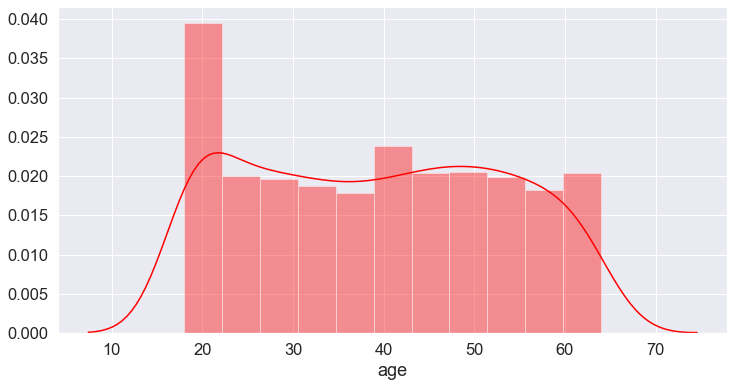

In [14]:
plt.figure(figsize=(12,6))
ax = sns.distplot(df["age"], color = 'r')

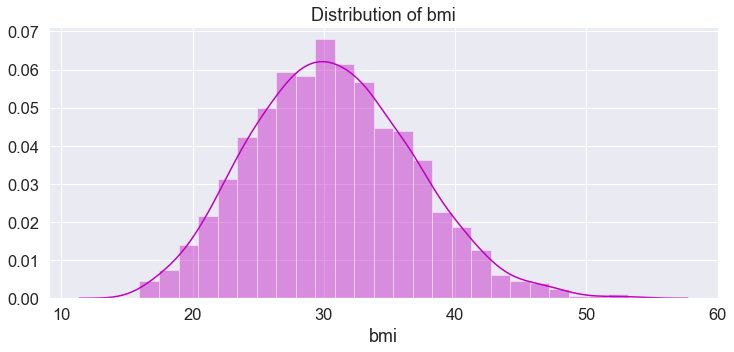

In [15]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
sns.distplot(df["bmi"], color = 'm')

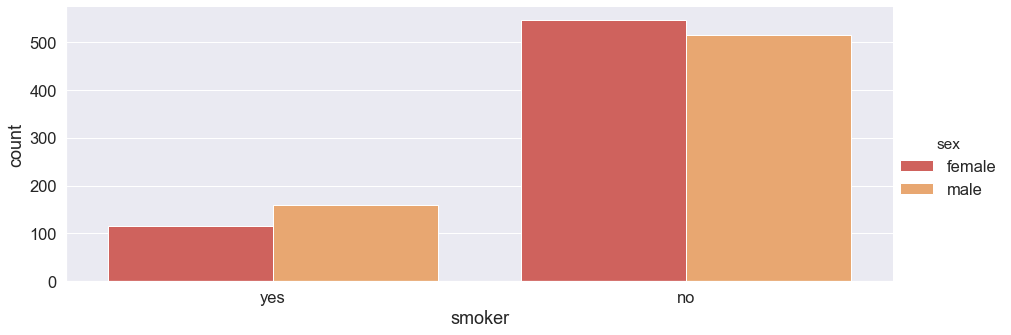

In [16]:
sns.factorplot(x='smoker', data=df , kind='count',aspect=2.5,hue='sex' )


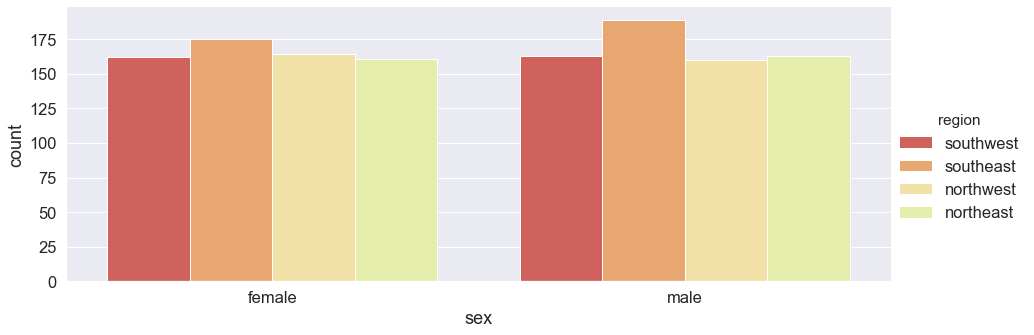

In [17]:
sns.factorplot(x='sex', data=df , kind='count',aspect=2.5,hue='region' )


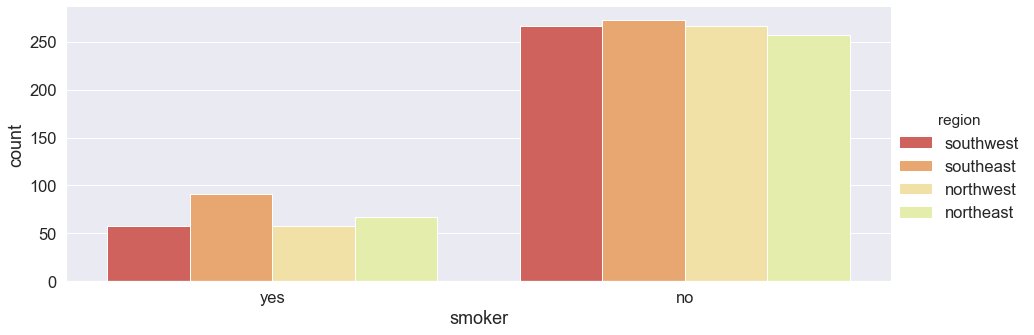

In [18]:
sns.factorplot(x='smoker', data=df , kind='count',aspect=2.5,hue='region' )


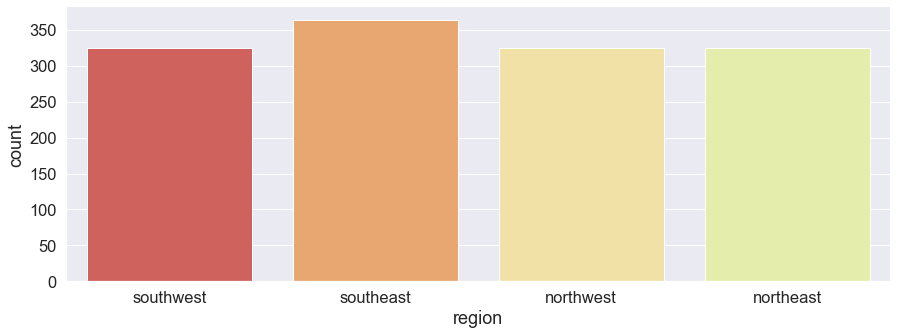

In [19]:
sns.factorplot(x='region', data=df , kind='count',aspect=2.5 )


In [ ]:
sns.factorplot(x='smoker', y='charges', data=df, kind='box' ,aspect=2.5 )


In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [ ]:
df.shape

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.head()

In [ ]:
main_df=df.copy()


In [ ]:
df.head()

In [ ]:
sns.heatmap(df.corr())


# Split the Data

In [ ]:
X = df.drop(["charges"],axis=1)
y = df.charges

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3 ,random_state=0)

In [ ]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' ,  'AdaBoost Regression'  , 'GradientBoosting Regression','RandomForest Regression']

# Modeling

In [ ]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

In [ ]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


In [ ]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

In [ ]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

In [ ]:
clf_rf = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

In [ ]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

In [ ]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

In [ ]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

In [ ]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)
